#Importing Important Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.model_selection import train_test_split
%matplotlib inline

#Fetching the data Through Pandas

In [7]:
data=pd.read_csv('/train.csv')

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.shape

(891, 12)

#Data Preprocessing
##1. Finding Missing Values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

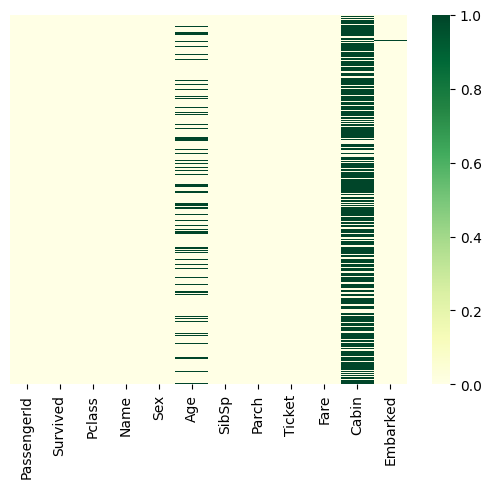

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap="YlGn")

  #These Strips in above heatmap is showing the missing values in the data in each column

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####So from this we can compute that there are 687 Null values in Cabin, 177 null values in Age and only  2 null values in Embarked
#### Therefore, we will Drop Cabin column, Fill the average Value in Age column and drop the two rows values where Embarked value is null


##2. Data Cleansing
####-Droping Cabin

In [13]:
data.drop('Cabin',axis=1,inplace=True)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


##-Filling average value in Age
####We will check that is age is depending on any of the other feature: -

<ipython-input-15-43f536a15c51>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,x="Pclass",y="Age",palette="winter")


<Axes: xlabel='Pclass', ylabel='Age'>

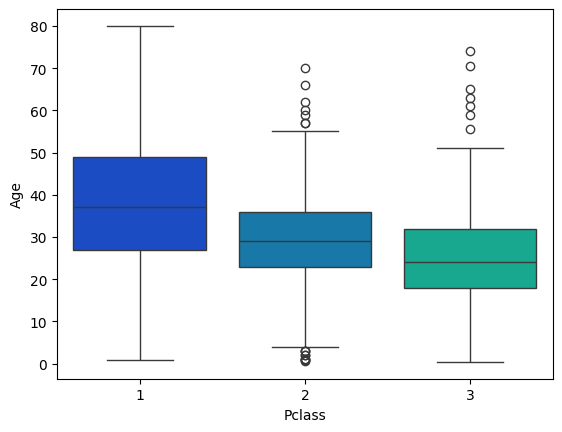

In [15]:
sns.boxplot(data,x="Pclass",y="Age",palette="winter")

<ipython-input-16-2315c2403d4c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,x="Sex",y="Age",palette="winter")


<Axes: xlabel='Sex', ylabel='Age'>

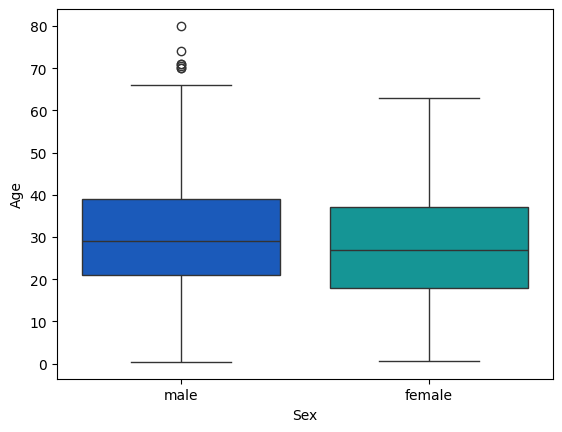

In [16]:
sns.boxplot(data,x="Sex",y="Age",palette="winter")

<ipython-input-17-4de43872e128>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,x="SibSp",y="Age",palette="winter")


<Axes: xlabel='SibSp', ylabel='Age'>

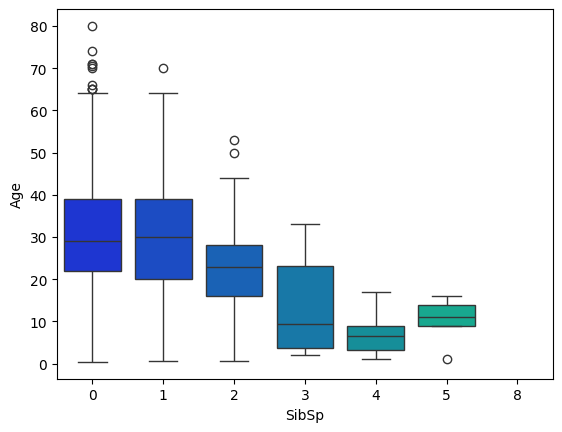

In [17]:
sns.boxplot(data,x="SibSp",y="Age",palette="winter")

<ipython-input-18-db76ece2e309>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,x="Parch",y="Age",palette="winter")


<Axes: xlabel='Parch', ylabel='Age'>

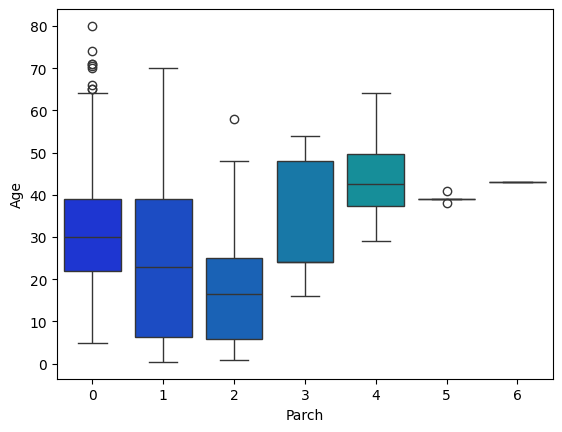

In [18]:

sns.boxplot(data,x="Parch",y="Age",palette="winter")



<ipython-input-19-9b6caaba9ecc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,x="Ticket",y="Age",palette="winter")


<Axes: xlabel='Ticket', ylabel='Age'>

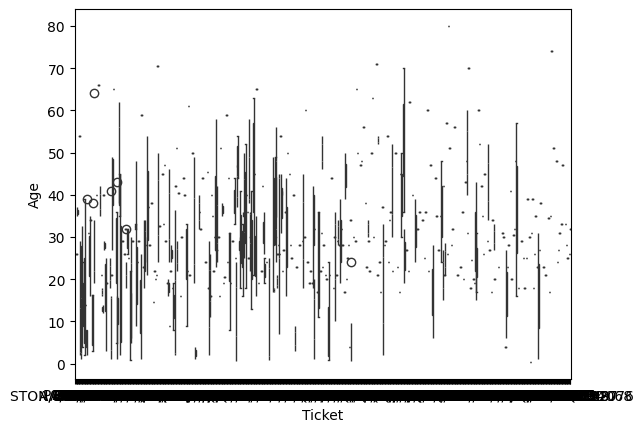

In [19]:

sns.boxplot(data,x="Ticket",y="Age",palette="winter")

<ipython-input-20-cf7d107961e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,x="Embarked",y="Age",palette="winter")


<Axes: xlabel='Embarked', ylabel='Age'>

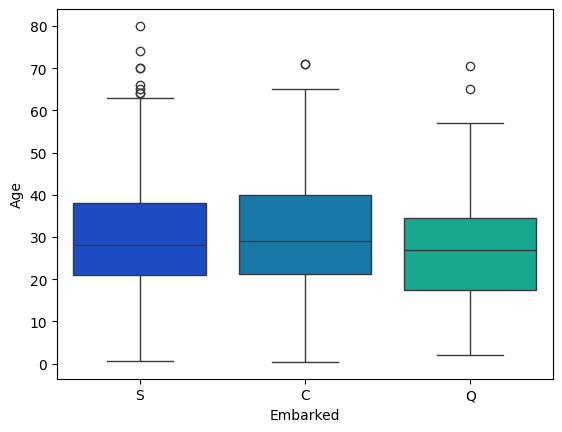

In [20]:

sns.boxplot(data,x="Embarked",y="Age",palette="winter")

##In our case age is not depending on any of the criteria Therefore, We'll fill the MEAN value in the Null places

In [21]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [22]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Now the Missing values Problem in Age is solved
###3. Resolving Missing value in Embarked Column


Here we'll fill the mode value in place of missing value(since the Embarked value is in the form of object


In [23]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [24]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###now all the missing value issue is rectified


###Now lets convert the categorical values to the  int values for the purpose of Analysis


#Analysis



##Visualizing Survived persons


Text(0.5, 1.0, 'Survived ratio')

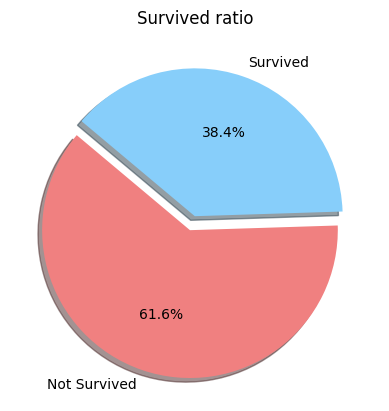

In [25]:
Survived_Column= "Survived"
count_0 = data[data[Survived_Column]==0][Survived_Column].count()
count_1 = data[data[Survived_Column]==1][Survived_Column].count()

labels=["Not Survived","Survived"]
Slice=[count_0,count_1]
color=['lightcoral', 'lightskyblue']
explode=(0.1,0)

plt.pie(Slice,explode=explode,labels=labels,colors=color ,autopct='%1.1f%%', shadow=True, startangle=140)


plt.title("Survived ratio")

##Visualizing Survived persons on the basis of Sex

<Axes: xlabel='Sex', ylabel='count'>

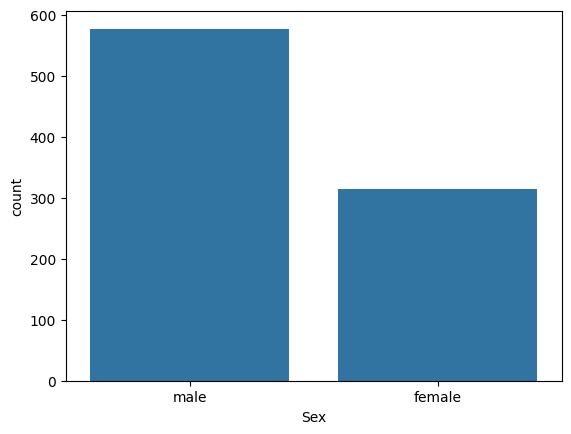

In [26]:
sns.countplot(data,x="Sex")

<Axes: xlabel='Sex', ylabel='count'>

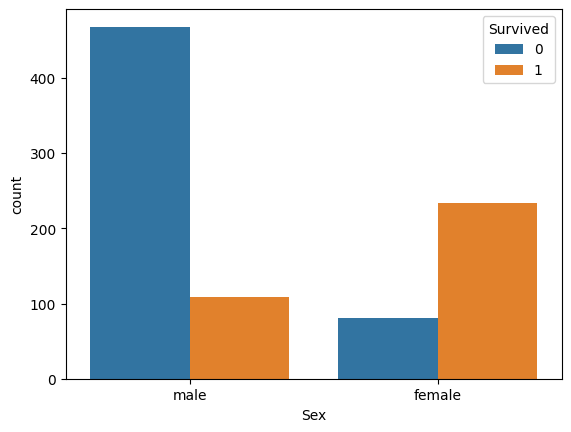

In [27]:
sns.countplot(data,x="Sex",hue="Survived")

##Visualizing the average age of the Passengers

---

on the Ship

In [28]:
px.scatter(data,x="PassengerId",y="Age",color="Age",title=('Mean Age='+ str(data.Age.mean())))



###Visualizing Survived persons on the basis of Sex, Age and passenger Id


In [29]:
px.scatter_3d(data,x="PassengerId",y="Sex",z="Age",color="Age")

###Visualizing Survived persons on the basis of there Coach(Class)

<Axes: xlabel='Pclass', ylabel='count'>

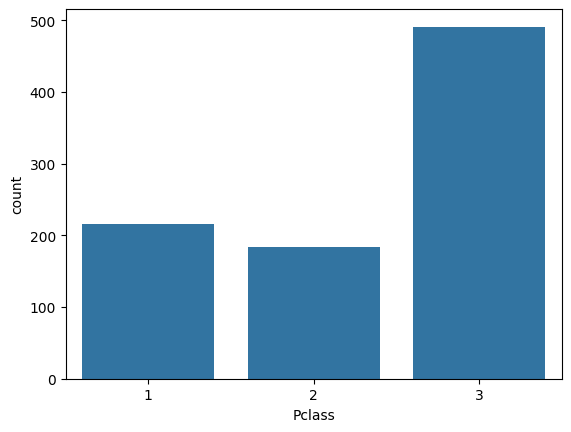

In [30]:
sns.countplot(data,x="Pclass")

<Axes: xlabel='Pclass', ylabel='count'>

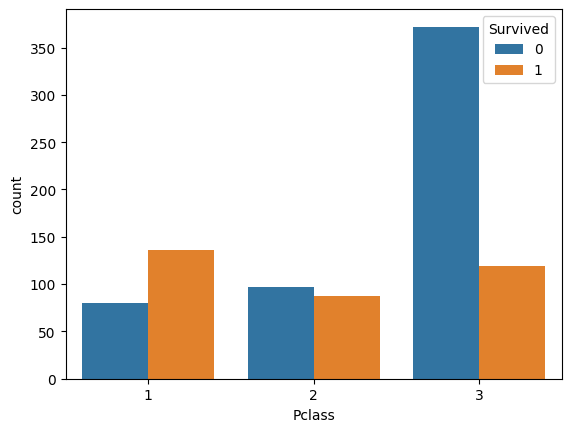

In [31]:
sns.countplot(data,x="Pclass",hue="Survived")

###Now we will convert the categorical data into the Integer data, so that we can dirive information from that


In [32]:
data.replace({"Sex":{"male":0,"female":1}},inplace=True)
data.replace({"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)


In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


#Model Building


###Spliting Feature and Target Columns

In [34]:
X=data.drop(columns=["PassengerId","Name","Ticket","Fare","Survived"])

In [35]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,0
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0
887,1,1,19.000000,0,0,0
888,3,1,29.699118,1,2,0
889,1,0,26.000000,0,0,1


In [36]:
Y=data["Survived"]

In [37]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(891, 6) (712, 6) (179, 6)


###SELECTING MODEL
####IN THIS MODEL WE ARE GONNA USE  LOGISTIC FUNCTION SINCE WE WILL BE HAVING ANSWERS OF SURVIVED OR NOT IN 0 OR 1 (i.e. ONLY TWO POSSIBLE OUTCOMES ARE THERE )(IN LOGISTIC TTHERE IS SIGMOID FUNCTION ONLY **bold text**)

In [40]:
Model= LogisticRegression()

In [41]:
Model.fit(X_train,Y_train)

LogisticRegression()

In [42]:
X_train_predict=Model.predict(X_train)

In [43]:
X_train_predict

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

TESTING TRAINING DATA

In [44]:
training_data_accuracy= accuracy_score(Y_train,X_train_predict)

In [45]:
training_data_accuracy

0.8117977528089888

TESTING TEST DATA

In [46]:
X_test_predict=Model.predict(X_test)

In [47]:
testing_data_accuracy= accuracy_score(Y_test,X_test_predict)

In [48]:
testing_data_accuracy

0.7877094972067039